In [2]:
import pandas as pd

import numpy as np

import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline


import math
from pylab import rcParams

rcParams['figure.figsize']=5,4
sns.set_style('whitegrid')

# Extracting CSV file

In [3]:
variable1=pd.read_csv(r"C:\Users\IDEAPAD\dataset\diabetes.csv")

In [4]:
variable1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
variable1.columns
variable1.shape

(768, 9)

# Data Wrangling

In [6]:
print('Total number of rows:{0}'.format(len(variable1)))
print('Number of rows missing glucose_conc:{0}'.format(len(variable1.loc[variable1['Glucose']==0])))
print('Number of rows missing BloodPressure:{0}'.format(len(variable1.loc[variable1['BloodPressure']==0])))
print('Number of rows missing SkinThickness:{0}'.format(len(variable1.loc[variable1['SkinThickness']==0])))
print('Number of rows missing Insulin:{0}'.format(len(variable1.loc[variable1['Insulin']==0])))
print('Number of rows missing BMI:{0}'.format(len(variable1.loc[variable1['BMI']==0])))
print('Number of rows missing DiabetesPedigreeFunction:{0}'.format(len(variable1.loc[variable1['DiabetesPedigreeFunction']==0])))
print('Number of rows missing Age:{0}'.format(len(variable1.loc[variable1['Age']==0])))
#np.mean(variable.Insulin)


Total number of rows:768
Number of rows missing glucose_conc:5
Number of rows missing BloodPressure:35
Number of rows missing SkinThickness:227
Number of rows missing Insulin:374
Number of rows missing BMI:11
Number of rows missing DiabetesPedigreeFunction:0
Number of rows missing Age:0


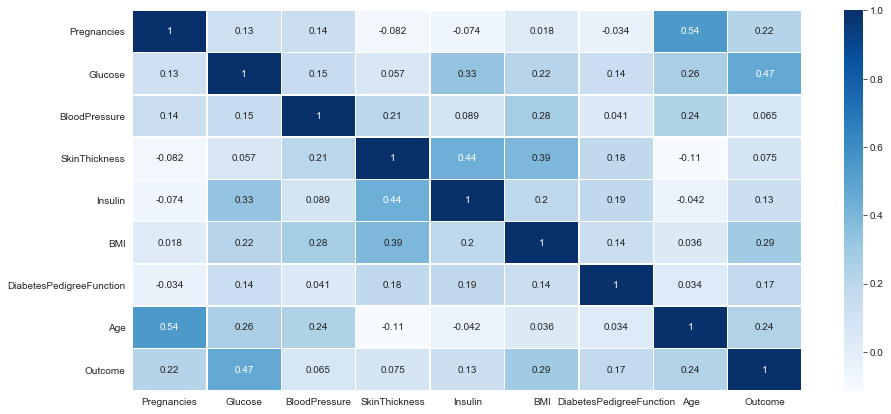

In [7]:
plt.figure(figsize=(15,7))
sns.heatmap(variable1.corr(),annot=True,linewidth=0.5,cmap='Blues')

In [8]:


#variable1.drop('BloodPressure',axis=1,inplace=True)
variable1.drop('SkinThickness',axis=1,inplace=True)
variable1.drop('DiabetesPedigreeFunction',axis=1,inplace=True)
variable = variable1[variable1.Insulin!= 0]


In [9]:
variable.head()
variable.shape

(394, 7)

In [10]:
print('Total number of rows:{0}'.format(len(variable)))
print('Number of rows missing glucose_conc:{0}'.format(len(variable.loc[variable['Glucose']==0])))
print('Number of rows missing BloodPressure:{0}'.format(len(variable.loc[variable['BloodPressure']==0])))
#print('Number of rows missing SkinThickness:{0}'.format(len(variable.loc[variable['SkinThickness']==0])))
print('Number of rows missing Insulin:{0}'.format(len(variable.loc[variable['Insulin']==0])))
print('Number of rows missing BMI:{0}'.format(len(variable.loc[variable['BMI']==0])))
#print('Number of rows missing DiabetesPedigreeFunction:{0}'.format(len(variable.loc[variable['DiabetesPedigreeFunction']==0])))
print('Number of rows missing Age:{0}'.format(len(variable.loc[variable['Age']==0])))
#np.mean(variable.Insulin)


Total number of rows:394
Number of rows missing glucose_conc:1
Number of rows missing BloodPressure:0
Number of rows missing Insulin:0
Number of rows missing BMI:1
Number of rows missing Age:0


# Analyzing Data

In [11]:
variable['Outcome'].value_counts()

0    264
1    130
Name: Outcome, dtype: int64

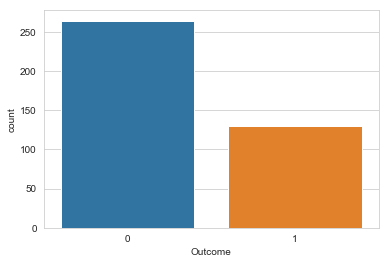

In [12]:
sns.countplot(x='Outcome',data=variable)

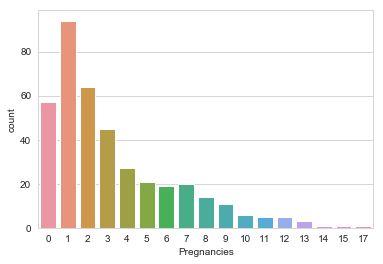

In [13]:
sns.countplot(x='Pregnancies',data=variable)

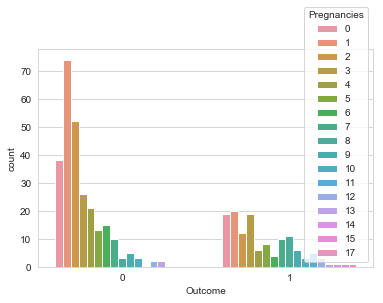

In [14]:
sns.countplot(x='Outcome',hue='Pregnancies',data=variable)

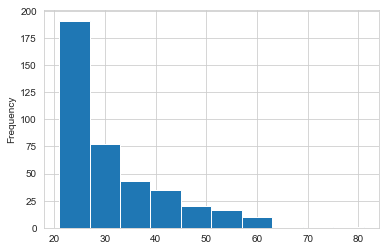

In [15]:
variable['Age'].plot.hist()

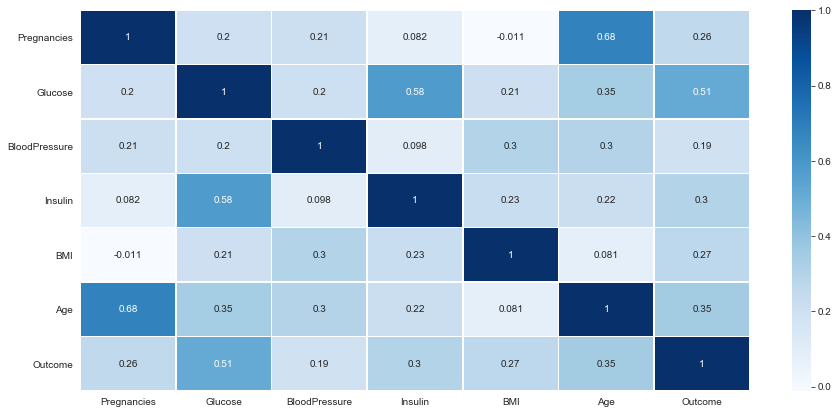

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(variable.corr(),annot=True,linewidth=0.5,cmap='Blues')

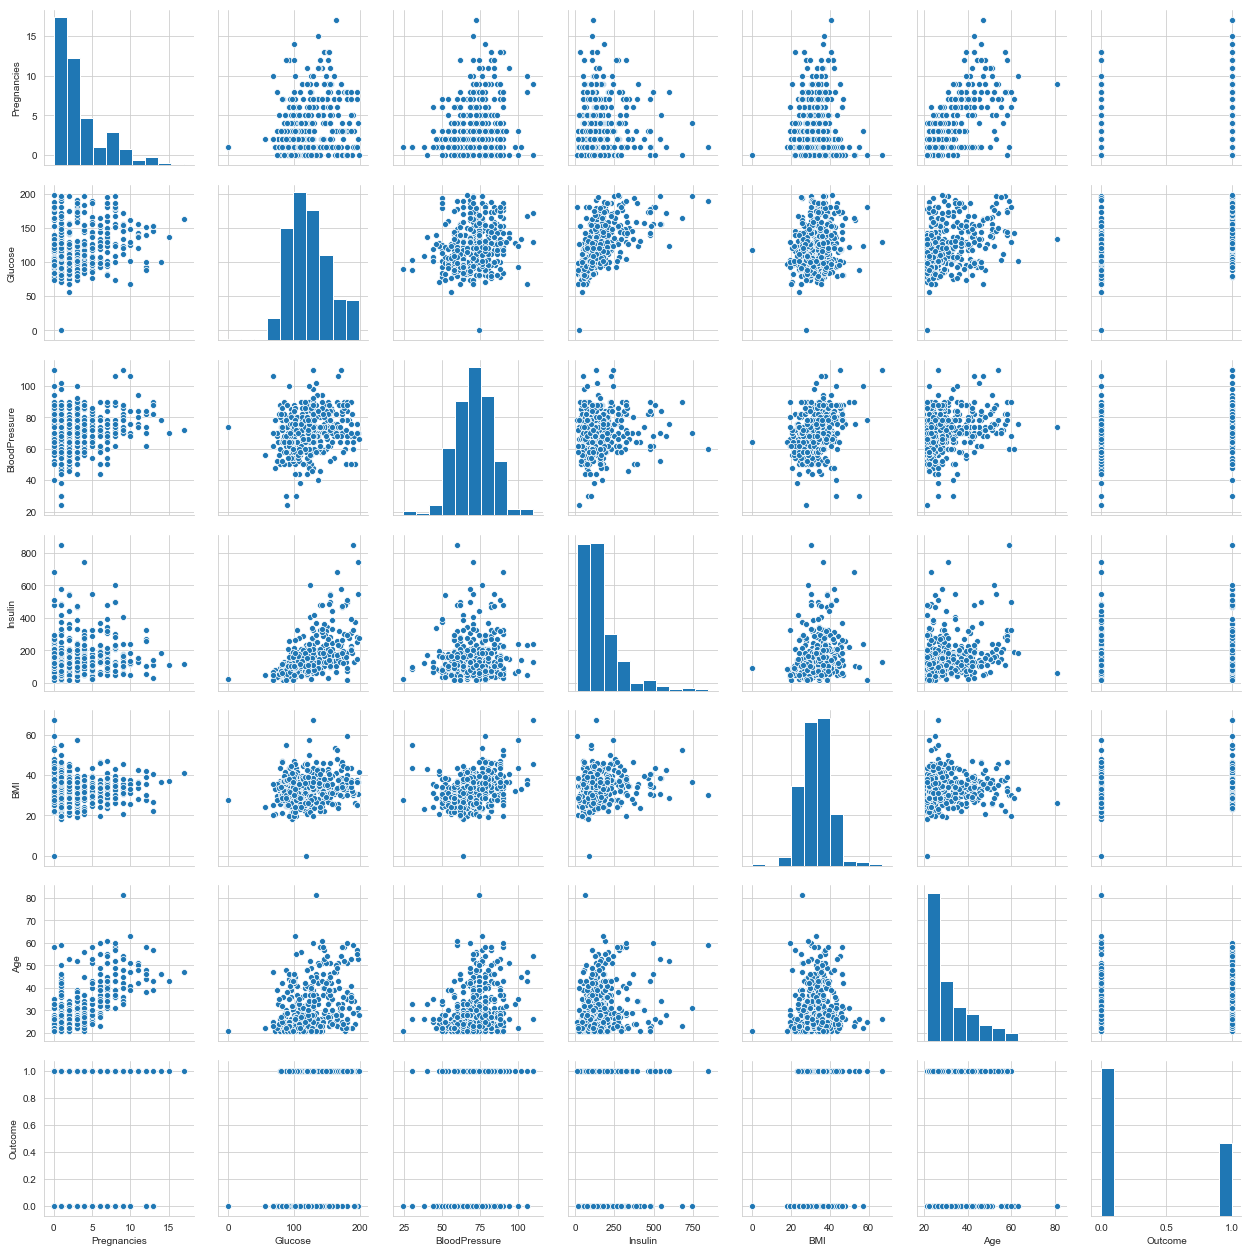

In [17]:
sns.pairplot(variable)

# Detecting outlier using Z score


Formula for Z score=(Observation-Mean)/Standard Deviation

Outliers in Pregnancies

mean= 3.286802030456853
standard deviation= 3.2055596415650096


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


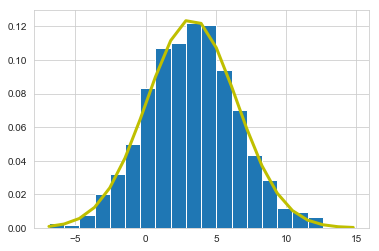

In [18]:
mu=np.mean(variable.Pregnancies)
sigma=np.std(variable.Pregnancies)
s=np.random.normal(mu,sigma,1000)
print('mean=',mu)
print('standard deviation=',sigma)

#create biins and histogram
count,bins,ignored=plt.hist(s,20,normed=True)

#Plot the distribution curve
plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),
        linewidth=3,color='y')
plt.show()

#x is continuous randam variable

In [19]:
mu+(3*sigma)

12.903480955151881

In [20]:
outliers=[]
def detect_outliers(Pregnancies1):
    threshold=3
    mean=np.mean(Pregnancies1)
    std=np.std(Pregnancies1)
    
    for i in Pregnancies1:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [21]:
outliers_pt=detect_outliers(variable.Pregnancies)
print('Outliers=',outliers_pt)

Outliers= [13, 15, 17, 14, 13, 13]


Outliers in Glucose

mean= 122.30456852791878
standard deviation= 31.356855959690478


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


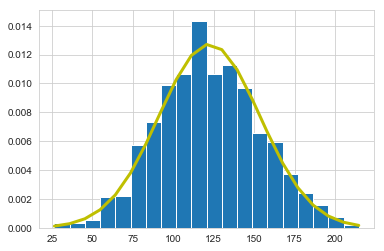

In [22]:
mu=np.mean(variable.Glucose)
sigma=np.std(variable.Glucose)
s=np.random.normal(mu,sigma,1000)
print('mean=',mu)
print('standard deviation=',sigma)

#create biins and histogram
count,bins,ignored=plt.hist(s,20,normed=True)

#Plot the distribution curve
plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),
        linewidth=3,color='y')
plt.show()

#x is continuous randam variable

In [23]:
outliers=[]
def detect_outliers(Glucose1):
    threshold=3
    mean=np.mean(Glucose1)
    std=np.std(Glucose1)
    
    for i in Glucose1:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [24]:
outliers_pt=detect_outliers(variable.Glucose)
print('Outliers=',outliers_pt)

Outliers= [0]


In [25]:
#plt.boxplot(variable.Glucose,showmeans=True)

Outliers in Blood Pressure

mean= 70.65482233502539
standard deviation= 12.454083773341567


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


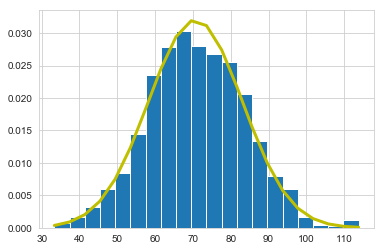

In [26]:
mu=np.mean(variable.BloodPressure)
sigma=np.std(variable.BloodPressure)
s=np.random.normal(mu,sigma,1000)
print('mean=',mu)
print('standard deviation=',sigma)

#create biins and histogram
count,bins,ignored=plt.hist(s,20,normed=True)

#Plot the distribution curve
plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),
        linewidth=3,color='y')
plt.show()

#x is continuous randam variable

In [27]:
outliers=[]
def detect_outliers(BloodPressure1):
    threshold=3
    mean=np.mean(BloodPressure1)
    std=np.std(BloodPressure1)
    
    for i in BloodPressure1:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [28]:
outliers_pt=detect_outliers(variable.BloodPressure)
print('Outliers=',outliers_pt)

Outliers= [30, 110, 30, 110, 24]


Outliers in Age 

mean= 30.814720812182742
standard deviation= 10.186020406620276


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


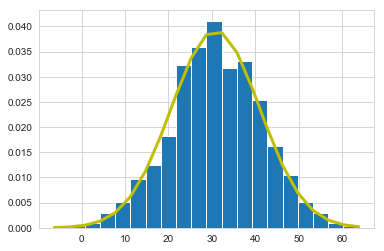

In [29]:
mu=np.mean(variable.Age)
sigma=np.std(variable.Age)
s=np.random.normal(mu,sigma,1000)
print('mean=',mu)
print('standard deviation=',sigma)

#create biins and histogram
count,bins,ignored=plt.hist(s,20,normed=True)

#Plot the distribution curve
plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),
        linewidth=3,color='y')
plt.show()

#x is continuous randam variable

In [30]:
outliers=[]
def detect_outliers(Age1):
    threshold=3
    mean=np.mean(Age1)
    std=np.std(Age1)
    
    for i in Age1:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [31]:
outliers_pt=detect_outliers(variable.Age)
print('Outliers=',outliers_pt)

Outliers= [81, 63]


In [32]:
#plt.boxplot(variable['Age'],showmeans=True,vert=False);

Outliers in BMI

mean= 32.98857868020302
Standard deviation= 7.201004337041017


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


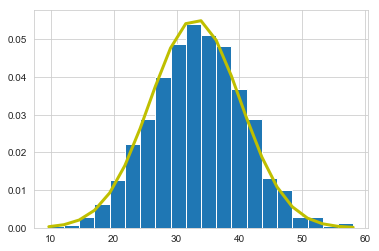

In [33]:
mu=np.mean(variable.BMI)
sigma=np.std(variable.BMI)
s=np.random.normal(mu,sigma,1000)
print('mean=',mu)
print('Standard deviation=',sigma)

#create biins and histogram
count,bins,ignored=plt.hist(s,20,normed=True)

#Plot the distribution curve
plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),
        linewidth=3,color='y')
plt.show()

#x is continuous randam variable

In [34]:
outliers=[]
def detect_outliers(BMI1):
    threshold=3
    mean=np.mean(BMI1)
    std=np.std(BMI1)
    
    for i in BMI1:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [35]:
outliers_pt=detect_outliers(variable.BMI)
print('Outliers=',outliers_pt)

Outliers= [55.0, 67.1, 0.0, 59.4, 57.3]


# Train and Test data

In [36]:

x=variable.drop('Outcome',axis=1)
y=variable['Outcome']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(315, 6) (79, 6) (315,) (79,)


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel=LogisticRegression()

In [41]:
x_test.head()
y_test.head()

94     0
99     1
499    0
127    0
520    0
Name: Outcome, dtype: int64

In [42]:
print(logmodel.fit(x_train,y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
variable.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age',
       'Outcome'],
      dtype='object')

In [44]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age
312,2,155,74,96,26.6,27
119,4,99,76,51,23.2,21
334,1,95,60,58,23.9,22
302,5,77,82,42,35.8,35
87,2,100,68,71,38.5,26


In [45]:
logmodel.intercept_

array([-4.06132535])

In [46]:
logmodel.coef_

array([[ 0.09577156,  0.02364644, -0.03187209,  0.00109397,  0.03879472,
         0.02855547]])

In [47]:
y=(-4.0614)+(0.09577*2)+(0.02365*142)+(-0.03188*82)+(0.001093*64)+(0.03879*24.7)+(0.02855*21)

In [48]:
y

-1.498105

In [49]:
import math
math.exp(y)/(1+math.exp(y))

0.18270832644005255

In [50]:
prediction=logmodel.predict(x_test)
#prediction=logmodel.predict(y_train)
prediction

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

# Mean Squared Error


In [51]:
np.mean((y_test-prediction)**2)

0.21518987341772153

In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,prediction)

0.21518987341772153

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85        54
           1       0.68      0.60      0.64        25

   micro avg       0.78      0.78      0.78        79
   macro avg       0.75      0.74      0.74        79
weighted avg       0.78      0.78      0.78        79



In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[47,  7],
       [10, 15]], dtype=int64)

# Accuracy of the model

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test,prediction)

0.7848101265822784

# Random Forest Classifier

In [58]:
x=variable.drop('Outcome',axis=1)
y=variable['Outcome']

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(315, 6) (79, 6) (315,) (79,)


In [60]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
model.score(x_test,y_test)

0.7974683544303798

In [62]:
y_pridicted=model.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pridicted)

In [64]:
cm

array([[47,  7],
       [ 9, 16]], dtype=int64)

Text(34.0, 0.5, 'Truth')

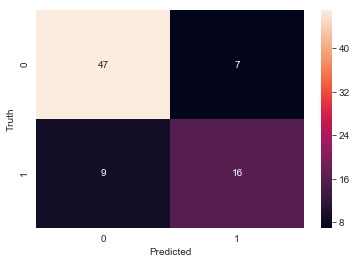

In [65]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# KNN

In [66]:
x=variable.drop('Outcome',axis=1)
y=variable['Outcome']

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234,stratify=y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(315, 6) (79, 6) (315,) (79,)


In [71]:
from sklearn.neighbors import KNeighborsClassifier
#create knn classifier
knn=KNeighborsClassifier(n_neighbors=7,metric='euclidean',p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [73]:
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [74]:
print("Accuracy:",knn.score(x_test,y_test))

Accuracy: 0.6962025316455697


In [75]:
print(confusion_matrix(y_test,y_pred))


[[46  7]
 [17  9]]


In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79        53
           1       0.56      0.35      0.43        26

   micro avg       0.70      0.70      0.70        79
   macro avg       0.65      0.61      0.61        79
weighted avg       0.67      0.70      0.67        79

